In [1]:
from fenics import *
from dolfin_adjoint import *
import pygmsh_mesh_functions
from pygmsh_mesh_functions import *
import meshio

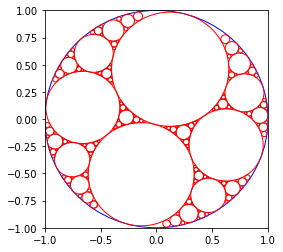

In [2]:
# Create mesh and define function space
# Apollonian_Gasket 
from Apollonian_Gasket import *
seed = 3
filepath = 'test_sample_deform/group_AG{:02d}_0.01/'.format(seed)
np.random.seed(seed)
R_0 = 1.0
r_c_1 = R_0*(np.random.rand(1)*0.5+0.25)
c0, R0 = Generate_circles(5,r_c_1)
plot_circles(c0, R0)

Info    : Running '/home/fenics/.local/bin/gmsh -3 /tmp/tmpaowdwhck.geo -format msh -bin -o /tmp/tmp10ys1rm_.msh' [Gmsh 4.9.5, 1 node, max. 1 thread]
Info    : Started on Sun Apr 24 17:39:26 2022
Info    : Reading '/tmp/tmpaowdwhck.geo'...
Info    : Done reading '/tmp/tmpaowdwhck.geo'
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 226 (Ellipse)
Info    : [ 10%] Meshing curve 227 (Line)
Info    : [ 10%] Meshing curve 228 (Line)
Info    : [ 20%] Meshing curve 229 (Line)
Info    : [ 20%] Meshing curve 230 (Line)
Info    : [ 30%] Meshing curve 231 (Ellipse)
Info    : [ 30%] Meshing curve 232 (Ellipse)
Info    : [ 40%] Meshing curve 233 (Ellipse)
Info    : [ 40%] Meshing curve 234 (Ellipse)
Info    : [ 50%] Meshing curve 235 (Ellipse)
Info    : [ 50%] Meshing curve 236 (Ellipse)
Info    : [ 50%] Meshing curve 237 (Ellipse)
Info    : [ 60%] Meshing curve 238 (Ellipse)
Info    : [ 60%] Meshing curve 239 (Ellipse)
Info    : [ 70%] Meshing curve 240 (Ellipse)
Info    : [ 70%] Meshing cu

3879

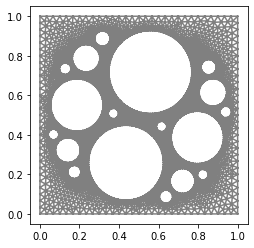

In [4]:
reset_geometry()

meshsize_min = 0.01
meshsize_max = 0.05

pygmsh_mesh_functions.hmeshmin = meshsize_min
pygmsh_mesh_functions.hmeshmax = meshsize_max

Lx = 1
Ly = 1
H = 1
# cx = [.0,1]
# cy = [.40,.60]
# R = [.05,.05]

cx = (c0[1:,0]/2)*0.95+0.5
cy = (c0[1:,1]/2)*0.95+0.5
R = R0[1:]/2*0.8

domain = add_polygon([(0, 0), (Lx, 0), (Lx, Ly), (0, Ly)])
X0 = np.array([0, 0])

R_min = 0.025
#OPERATIONS ON DOMAIN
for i in range(len(cx)):
    if R[i]>R_min:
        XEi=X0+np.array([cx[i],cy[i]])
        ell = [add_ellipse(XEi, R[i], R[i])]
        domain = subtract(domain, ell)

#CREATE AND STORE MESH
sample_name = "AG03.xdmf"
out_dir = pathlib.Path("output_files")
out_dir.mkdir(parents=True, exist_ok=True)
mesh = create_fenics_mesh(mesh_path = out_dir / sample_name, verbose=True)
cell_type = mesh.cell_name()
with create_XDMFFile(out_dir / sample_name) as xf:
    xf.write(mesh)
    
plot(mesh)
len(mesh.coordinates())